Here is an example from my Data Science Course, Exploring Marathon Finishing Times. I followed along and coded this based off of a previously coded example.

In [ ]:
# https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [3]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [5]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours = h, minutes = m, seconds = s)

data = pd.read_csv('marathon-data.csv', 
                  converters = {'split': convert_time, 'final': convert_time})

data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [6]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [7]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

/var/folders/9t/v3zk_h6j1_v3xhrc87z4_f340000gn/T/ipykernel_9921/3551630264.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['split_sec'] = data['split'].astype(int) / 1E9
/var/folders/9t/v3zk_h6j1_v3xhrc87z4_f340000gn/T/ipykernel_9921/3551630264.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['final_sec'] = data['final'].astype(int) / 1E9


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


/Users/vincenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


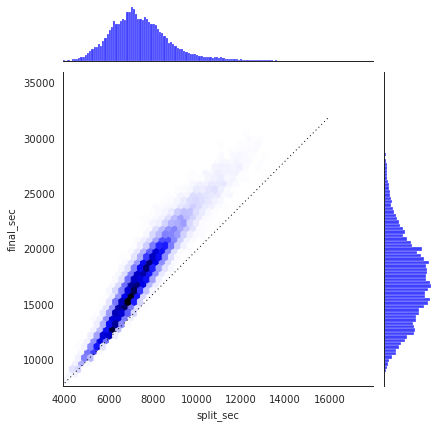

In [16]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [17]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


/Users/vincenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


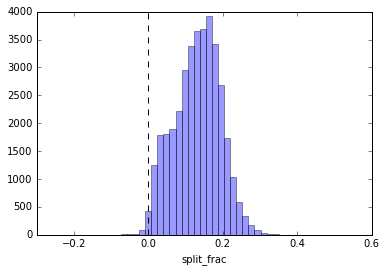

In [18]:
sns.distplot(data['split_frac'], kde = False)
plt.axvline(0, color = 'k', linestyle = '--')

In [19]:
sum(data.split_frac < 0)

251

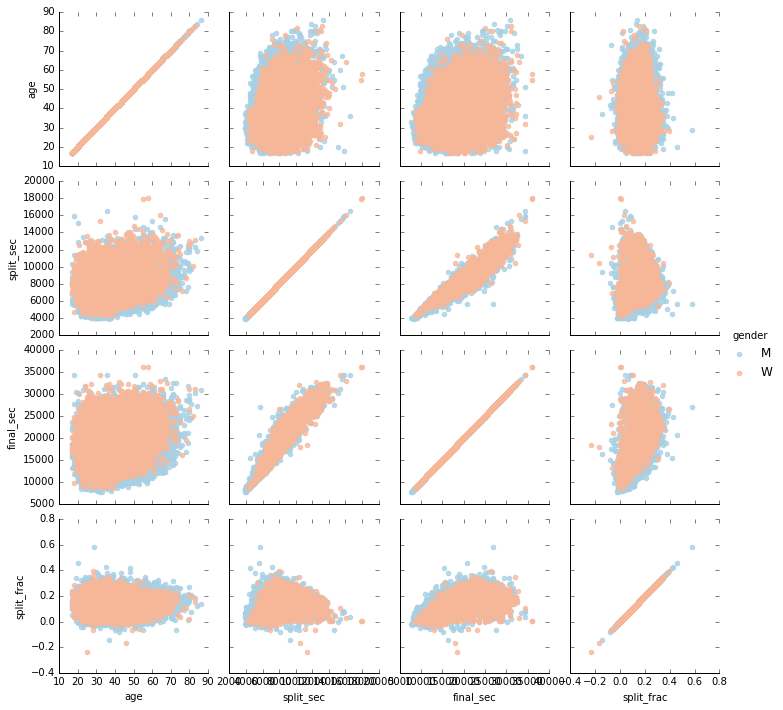

In [24]:
g = sns.PairGrid(data, vars = ['age', 'split_sec', 'final_sec', 'split_frac'],
                hue = 'gender', palette = 'RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend();

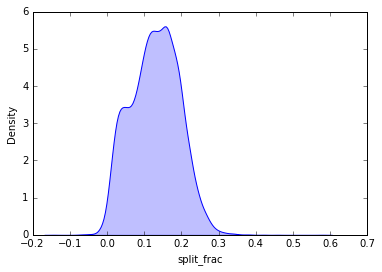

In [30]:
sns.kdeplot(data.split_frac[data.gender == 'M'], label = 'men', shade = True)
sns.kdeplot(data.split_frac[data.gender == 'F'], label = 'women', shade = True)
plt.xlabel('split_frac');

/Users/vincenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


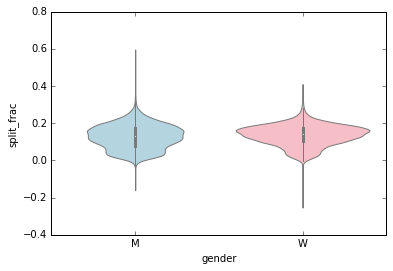

In [31]:
sns.violinplot('gender', 'split_frac', data = data,
              palette = ['lightblue', 'lightpink']);

In [33]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/Users/vincenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


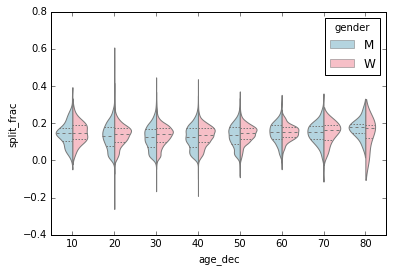

In [34]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style = None):
    sns.violinplot('age_dec', 'split_frac', hue = 'gender', data = data, 
                  split = True, inner = 'quartile',
                  palette = ['lightblue', 'lightpink']);

In [35]:
(data.age > 80).sum()

7

/Users/vincenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


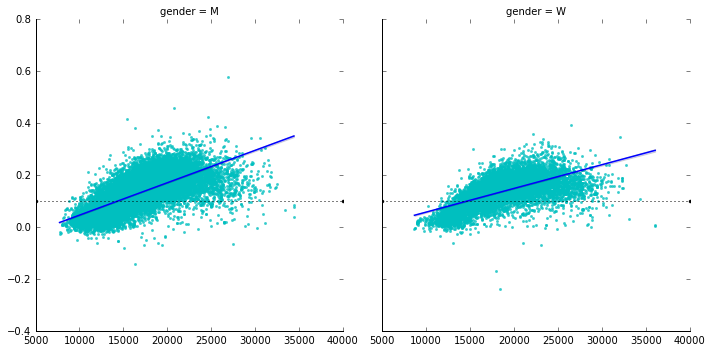

In [36]:
g = sns.lmplot('final_sec', 'split_frac', col = 'gender', data = data, 
              markers = '.', scatter_kws = dict(color = 'c'))
g.map(plt.axhline, y = 0.1, color = 'k', ls = ':');